### Import Statements

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import ggplot
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

/home/vgudavar/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/vgudavar/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/vgudavar/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Reading Data

In [3]:
df_train = pd.read_csv('../../../data/train.tsv', sep='\t')
df_test = pd.read_csv('../../../data/test.tsv', sep='\t')

### Distribution of prices

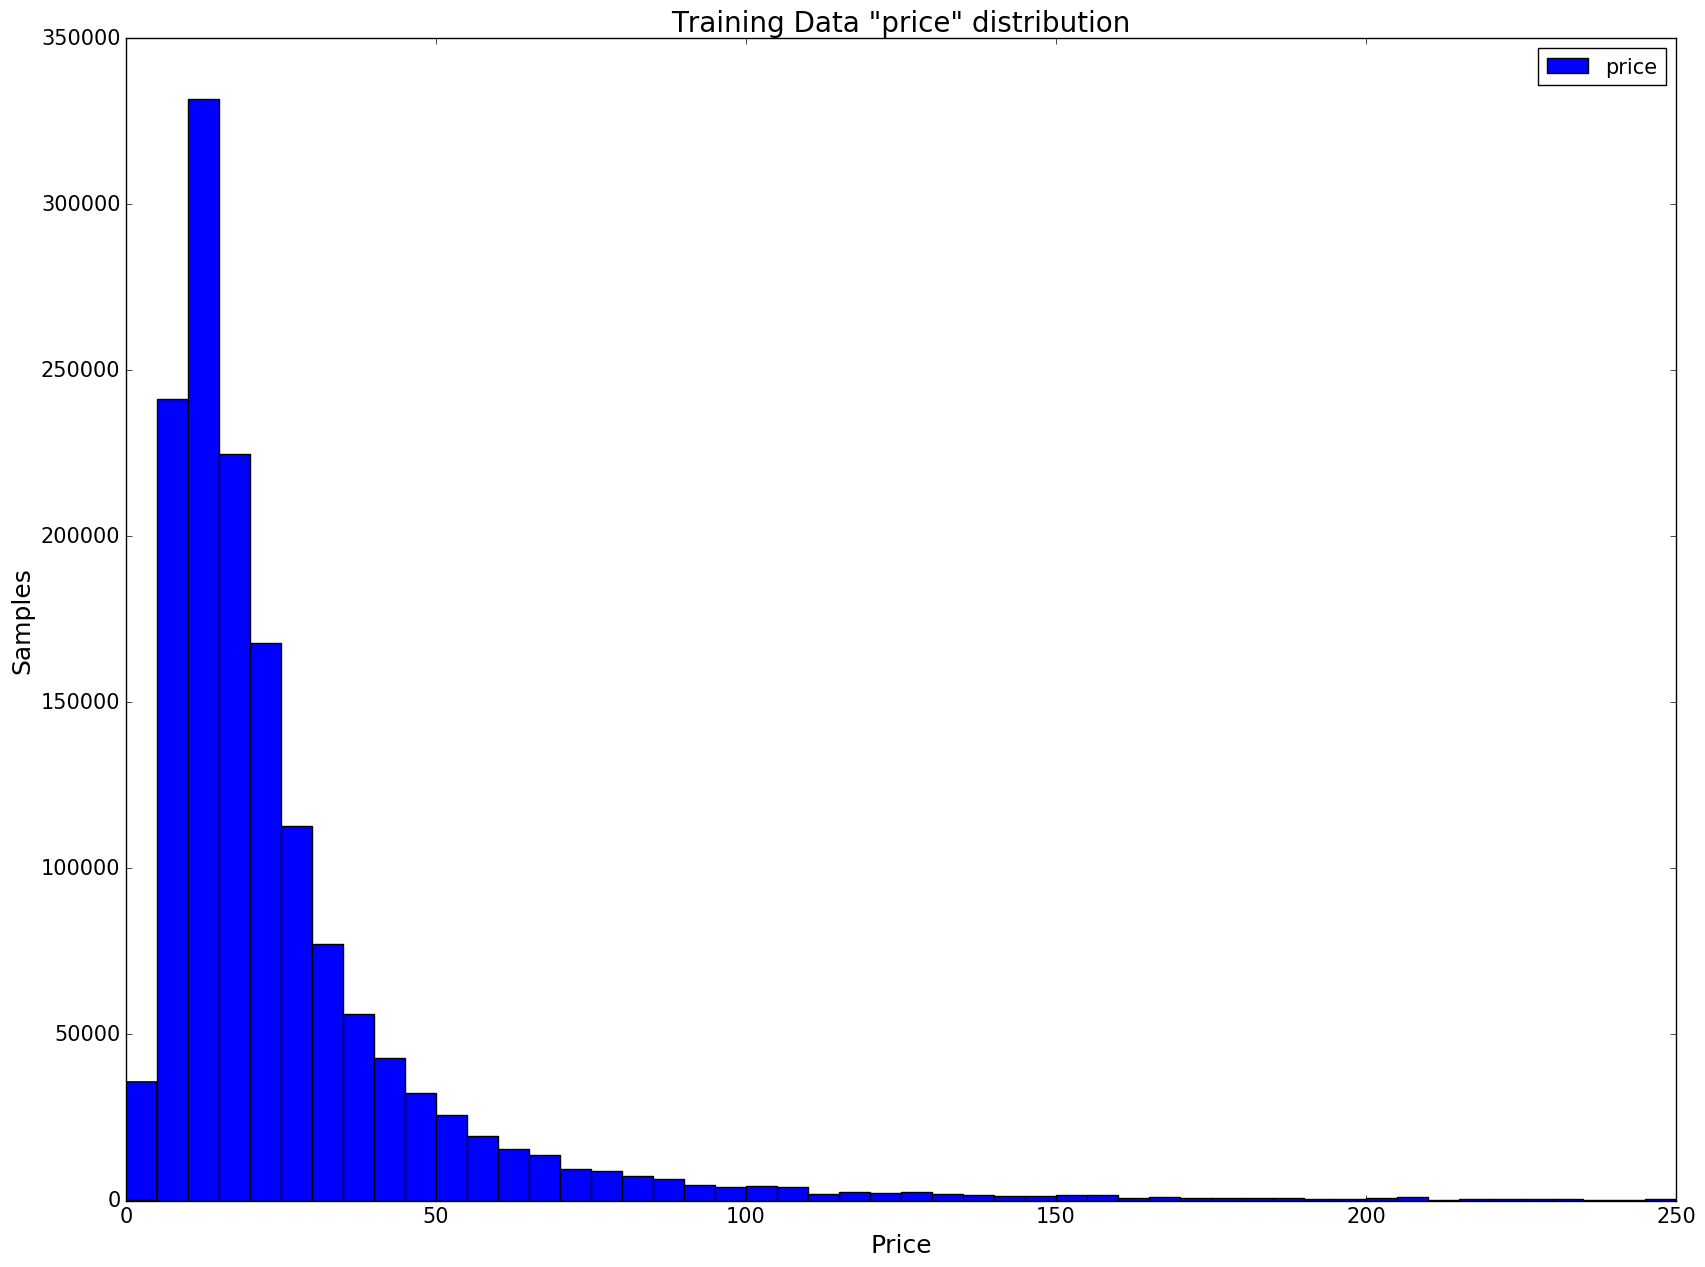

In [8]:
fig = plt.figure(figsize=(20, 15))
plt.hist(df_train['price'], bins=50, range=[0,250], label='price')
plt.title('Training Data "price" distribution', fontsize=20)
plt.xlabel('Price', fontsize=18)
plt.ylabel('Samples', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()
fig.savefig('trainPrice.png', bbox_inches='tight')